## INTRODUCTION

Sweet Lift Taxi Company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, they need to predict the number of taxi orders for the next hour.

___Request___
- Build a model to predict the number of taxi orders for the next hour
- The RECM metric on the test set should not exceed 48.

Theses Datasets come from the ___TrippleTen - Data Scientis Course___.

## DATA DESCRIPTION

taxi.csv
- num_orders: Total orders made

Index: datetime

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
taxi_df = pd.read_csv("taxi.csv", index_col=[0], parse_dates=[0])

In [61]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [62]:
taxi_df.sample(5)

,num_orders
datetime,
2018-04-09 05:20:00,3
2018-06-30 21:10:00,14
2018-07-25 09:00:00,9
2018-04-30 15:40:00,8
2018-08-19 08:30:00,19


In [63]:
# Re-ordering data
taxi_df.sort_index(inplace=True)

In [64]:
# Re-sampling data
taxi_df = taxi_df.resample('1H').sum()

C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3082792526.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxi_df = taxi_df.resample('1H').sum()


In [65]:
taxi_df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


## ANALYSIS

In [66]:
taxi_df['rolling_mean'] = taxi_df.rolling(10).mean()

<Axes: xlabel='datetime'>

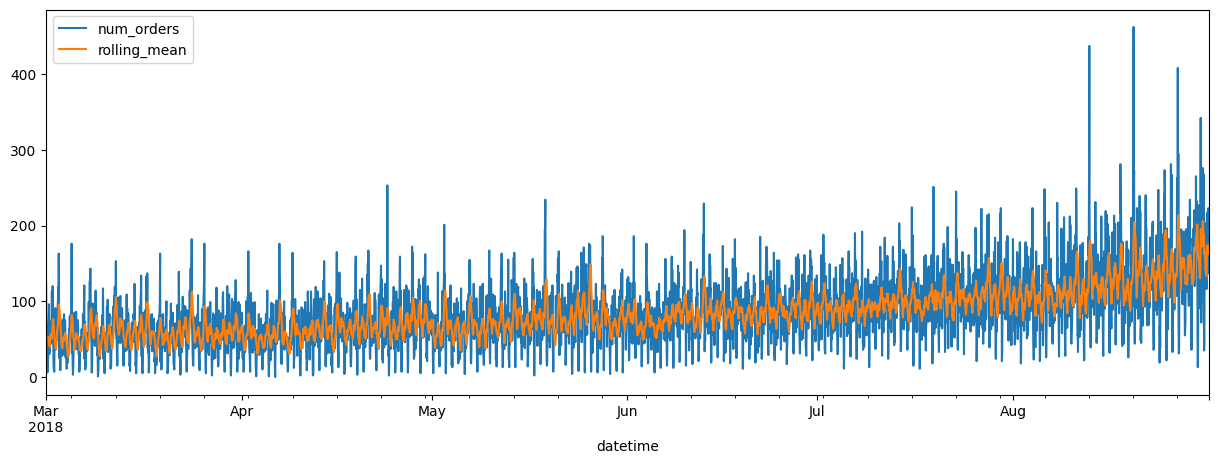

In [67]:
x = 15
y = 5
taxi_df.plot(figsize=(x, y))

Remarks

- At first glance, we cannot determine if it is a seasonal or trend series, so we will need to filter by month to identify its type.

### MARCH PLOT

<Axes: xlabel='datetime'>

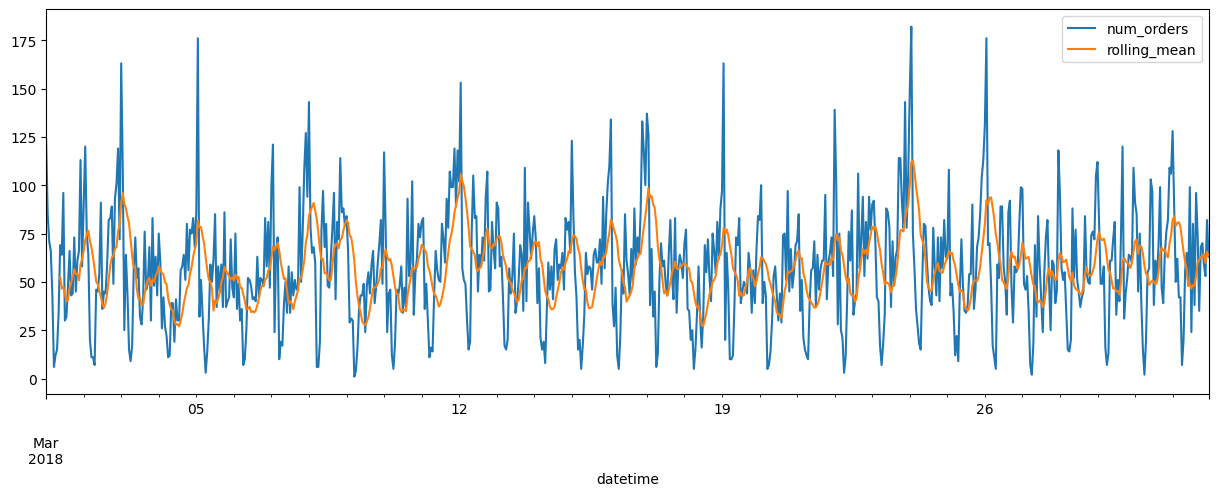

In [68]:
# March
taxi_df.loc['2018-03'].plot(figsize=(x, y))

### APRIL PLOT

<Axes: xlabel='datetime'>

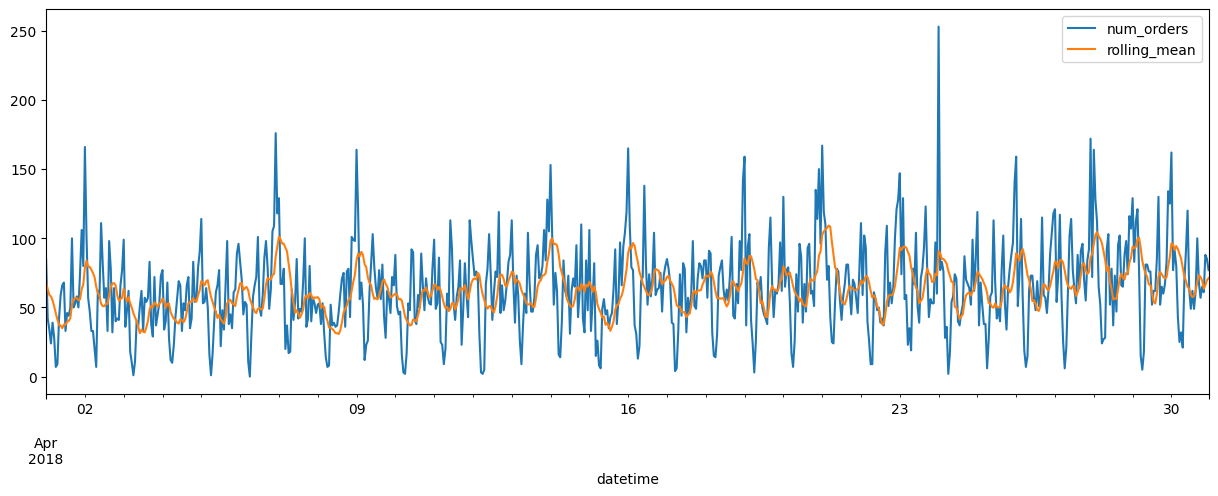

In [69]:
# April
taxi_df.loc['2018-04'].plot(figsize=(x, y))

### MAY PLOT

<Axes: xlabel='datetime'>

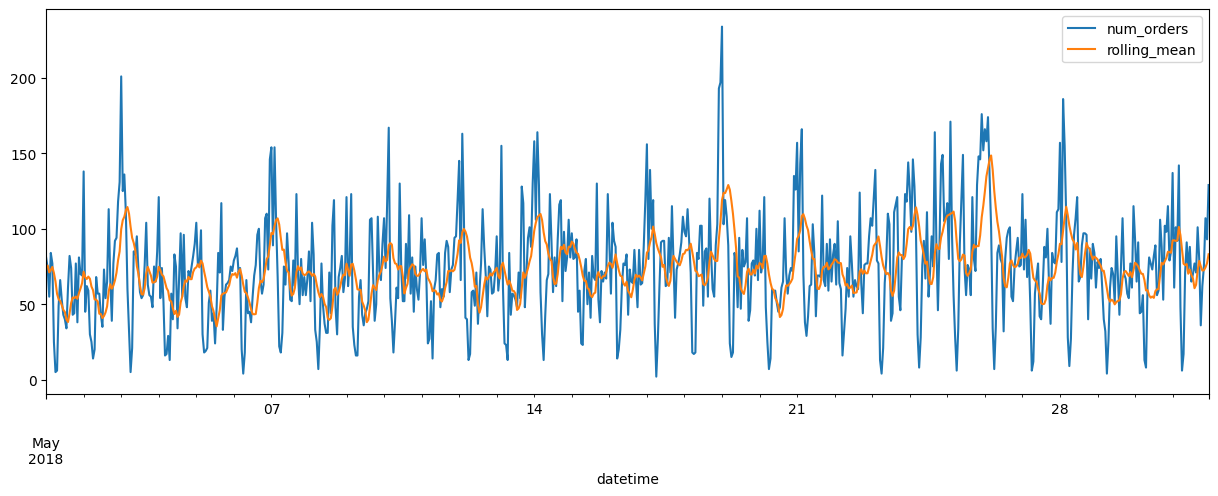

In [70]:
# May
taxi_df.loc['2018-05'].plot(figsize=(x, y))

### JUNE PLOT

<Axes: xlabel='datetime'>

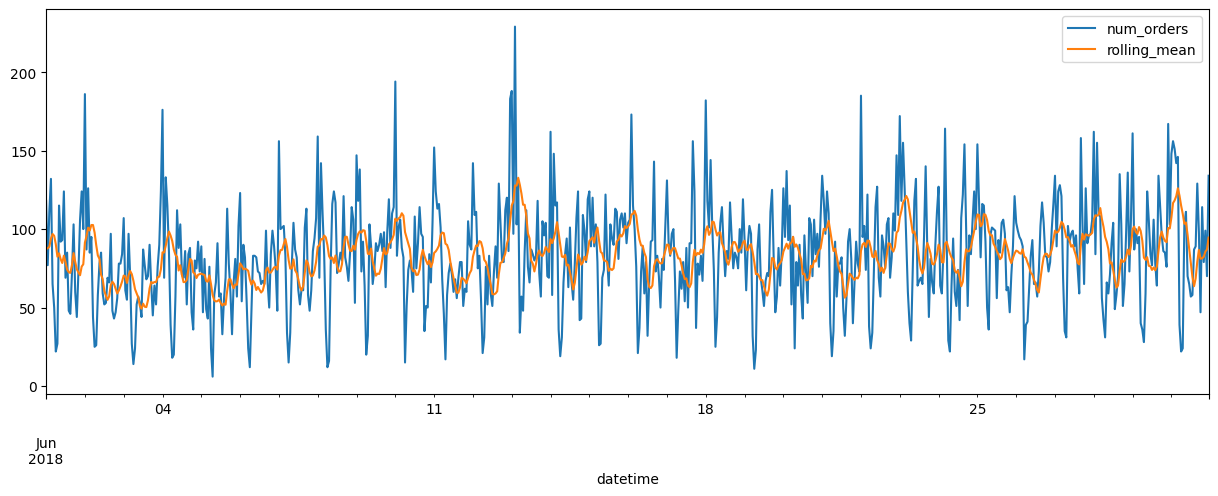

In [71]:
# June
taxi_df.loc['2018-06'].plot(figsize=(x, y))

### JULY PLOT

<Axes: xlabel='datetime'>

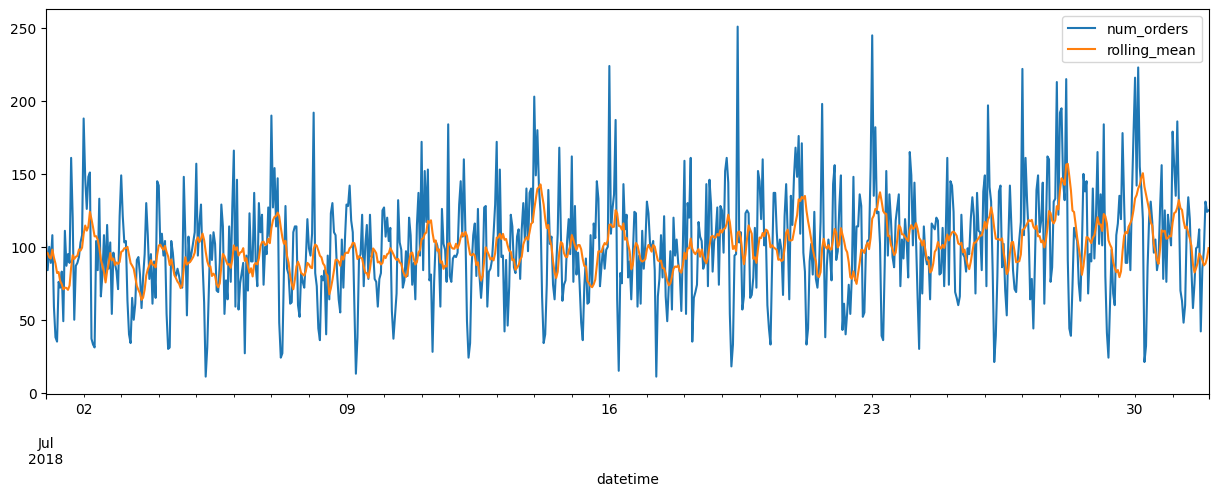

In [72]:
# July
taxi_df.loc['2018-07'].plot(figsize=(x, y))

### AUGUST PLOT

<Axes: xlabel='datetime'>

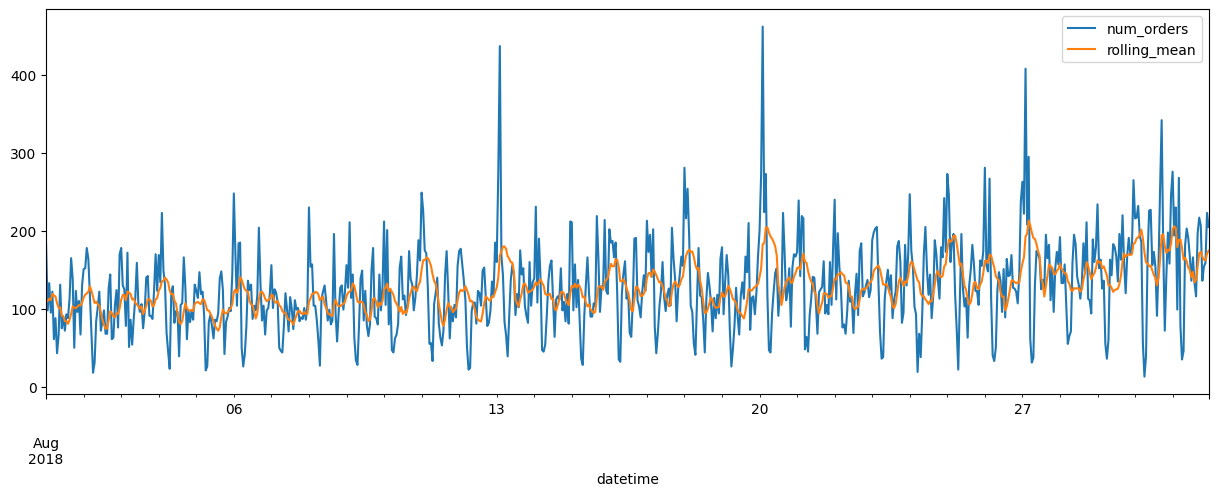

In [73]:
# August
taxi_df.loc['2018-08'].plot(figsize=(x, y))

Remarks

- When performing a close-up view by month, it may appear to be a seasonal series. However, when comparing these fragments with the full data, we realize that it is actually a trend series.

## CREATING A MODEL

In [74]:
# We create a function to apply to the model
# max_lag = lag
# rolling_mean = windowed mean of the data
def get_result(data, size, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )
    
    train, valid = train_test_split(data, shuffle=False, test_size=size)
    train = train.dropna()

    f_train = train.drop(['num_orders'], axis=1)
    t_train = train['num_orders']
    f_valid = valid.drop(['num_orders'], axis=1)
    t_valid = valid['num_orders']

    model = LinearRegression()
    model.fit(f_train, t_train)

    p_valid = model.predict(f_valid)
    
    result = mean_squared_error(t_valid,p_valid)**0.5
    return result


## TEST

In [75]:
print(f"Test 1: RMSE > {get_result(taxi_df,0.1, 5, 5)}")

Test 1: RMSE > 52.761790066268794


In [76]:
print(f"Test 2: RMSE > {get_result(taxi_df,0.1, 25, 5)}"

SyntaxError: incomplete input (951459313.py, line 1)

In [36]:
print(f"Test 3: RMSE > {get_result(taxi_df,0.1, 5, 25)}")

Test 3: RMSE > 45.671435011292786


In [37]:
print(f"Test 4: RMSE > {get_result(taxi_df,0.1, 5, 50)}")

Test 4: RMSE > 46.70235780098426


In [38]:
print(f"Test 5: RMSE > {get_result(taxi_df,0.1, 100, 5)}")

Test 5: RMSE > 41.50989313883825


C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [39]:
print(f"Test 6: RMSE > {get_result(taxi_df,0.1, 5,500)}")

Test 6: RMSE > 41.450453768397445


In [40]:
print(f"Test 7: RMSE > {get_result(taxi_df,0.1, 250, 250)}")

C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
C:\Users\JoseC\AppData\Local\Temp\ipykernel_9256\3708922803.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

Test 7: RMSE > 35.678827446899774


## FINAL CONCLUSTIONS

- We can observe that as the lag and rolling mean increase, the RMSE metric decreases. This is because, due to the nature of the time series, it seems that increasing the lag improves the results more than the rolling mean metric.